In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

import os 
import sys 
import re
from tqdm import tqdm
from joblib import Parallel, delayed

In [2]:
grid_search_fileNames = os.listdir('./save/')
grid_search_filePaths = [os.path.join('./save/',i) for i in grid_search_fileNames]

In [3]:
train_stats_all = []

def tmp_fun(filePath):
    res = torch.load(filePath)
    return({**res['args'], 'test_accu_record': res['train_stats']['test_accu_record']})

train_stats_all = Parallel(n_jobs=32)(delayed(tmp_fun)(i) for i in tqdm(grid_search_filePaths))

torch.save(train_stats_all, 'train_stats_all.pt')

100%|██████████| 10/10 [00:00<00:00, 827.74it/s]


In [3]:
train_stats_all = torch.load('train_stats_all.pt')

In [5]:
test_accu_final_list = []
for i in train_stats_all:
    test_accu_final_list.append(i['test_accu_record'][-1])

In [7]:
np.array(test_accu_final_list).argmax()

126

In [12]:
test_accu_final_list[126]

0.6259084302325582

In [13]:
train_stats_all[126]

{'epochs': 2000,
 'bs': 64,
 'lr': 0.005,
 'feature_dim': 3,
 'num_users': 48,
 'num_pairs_per_user': 300,
 'weight_decay_us': 0,
 'weight_decay_net': 0.001,
 'optimizer_name': 'adam',
 'test_accu_record': [0.5271519702842378,
  0.5491965439276486,
  0.5662952196382429,
  0.5800226098191215,
  0.5856952519379846,
  0.5901768410852714,
  0.5939518733850129,
  0.5952438630490956,
  0.5956677971576227,
  0.5973029715762274,
  0.5974442829457365,
  0.5995841408268734,
  0.5990996447028424,
  0.5999071382428941,
  0.5996043281653747,
  0.6004320090439277,
  0.6002705103359173,
  0.6014615633074936,
  0.6010174418604651,
  0.6019864341085271,
  0.6009568798449613,
  0.6022286821705426,
  0.600734819121447,
  0.6017845607235142,
  0.6012395025839793,
  0.6012395025839793,
  0.6028343023255814,
  0.6017845607235142,
  0.6031774870801033,
  0.6015423126614987,
  0.603500484496124,
  0.6022892441860465,
  0.6032380490956072,
  0.603015988372093,
  0.602672803617571,
  0.6023699935400517,
  0.602

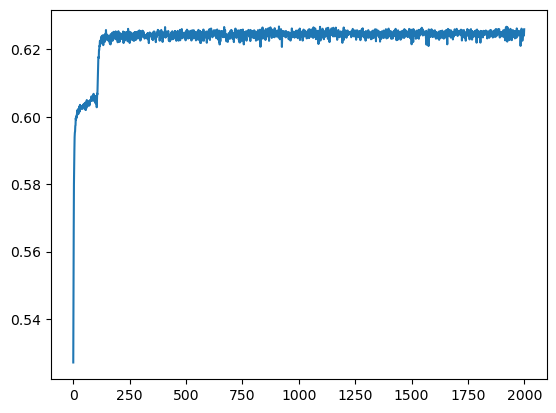

In [14]:
plt.plot(train_stats_all[126]['test_accu_record'])

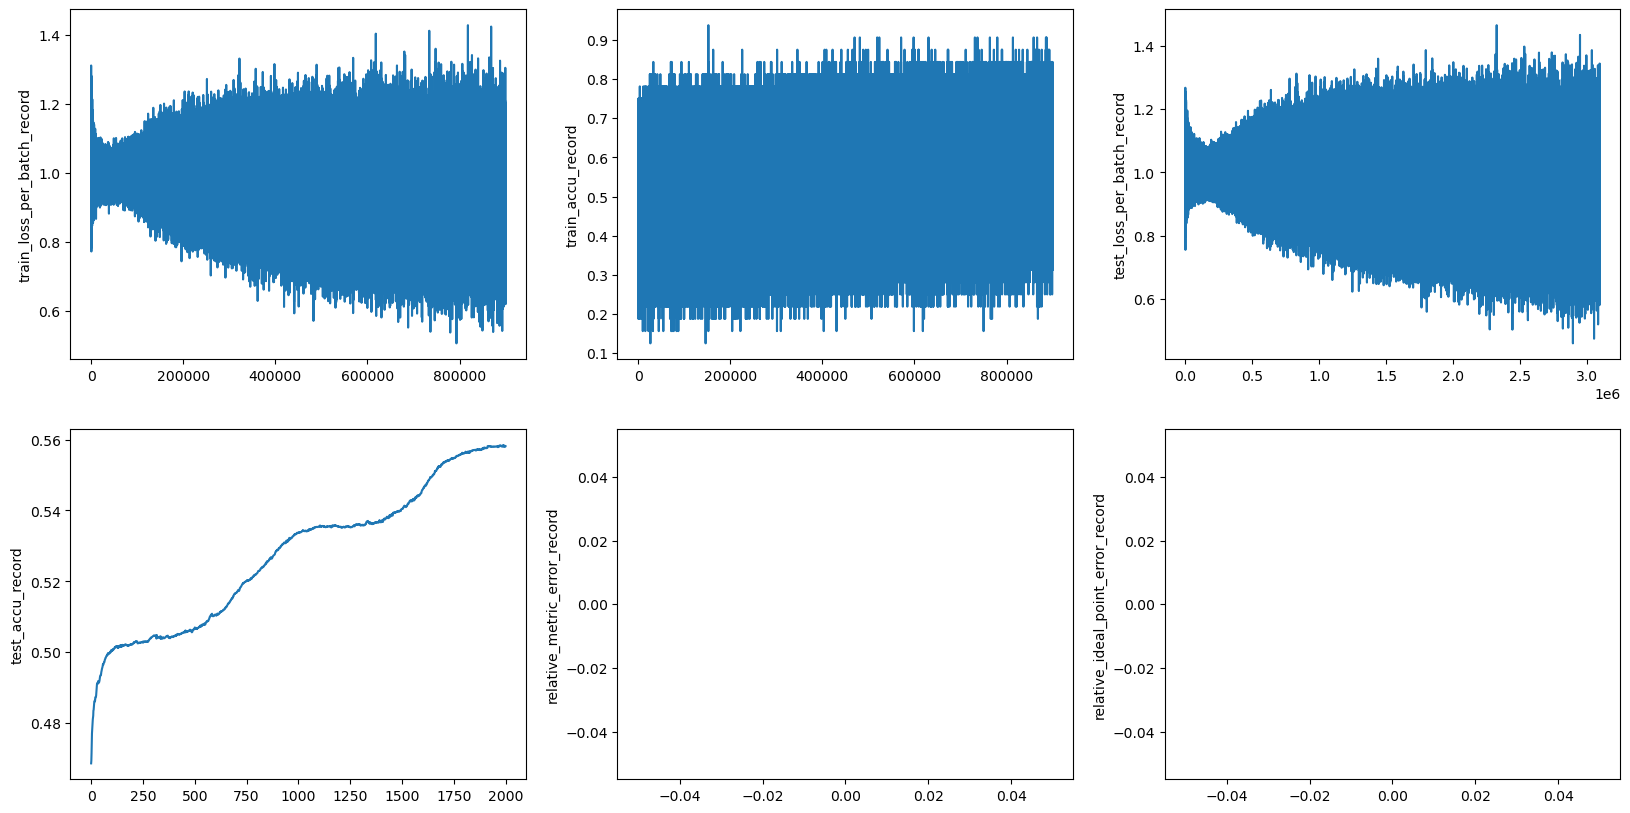

In [11]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
ax_flatten = ax.flatten()
for idx,key in enumerate(res['train_stats']):
    ax_flatten[idx].plot(res['train_stats'][key])
    ax_flatten[idx].set_ylabel(key)

In [22]:
grid_search_fileNames = os.listdir('./save/')
grid_search_filePaths = [os.path.join('./save/',i) for i in grid_search_fileNames if i.find('lrus') != -1]

In [5]:
train_stats_all = []

def tmp_fun(filePath):
    res = torch.load(filePath)
    return({**res['args'], 'test_accu_record': res['train_stats']['test_accu_record']})

train_stats_all = Parallel(n_jobs=32)(delayed(tmp_fun)(i) for i in tqdm(grid_search_filePaths))

torch.save(train_stats_all, 'train_stats_all.pt')

100%|██████████| 240/240 [00:09<00:00, 25.47it/s]


In [6]:
train_stats_all = torch.load('train_stats_all.pt')

In [7]:
test_accu_final_list = []
for i in train_stats_all:
    test_accu_final_list.append(i['test_accu_record'][-1])

In [15]:
np.array(test_accu_final_list).argmax()

190

In [23]:
grid_search_filePaths

['./save/grid_search_lrus0.0005_lrnet0.005_bs64_wdu0.0001_wdn0.01_optadam.pt',
 './save/grid_search_lrus0.005_lrnet0.0005_bs64_wdu0.001_wdn0_optadam.pt',
 './save/grid_search_lrus0.005_lrnet0.001_bs64_wdu0.0001_wdn0.01_optadam.pt',
 './save/grid_search_lrus0.0005_lrnet0.001_bs64_wdu0_wdn0.01_optadam.pt',
 './save/grid_search_lrus0.0001_lrnet0.005_bs64_wdu0.001_wdn0.001_optadam.pt',
 './save/grid_search_lrus0.005_lrnet0.0005_bs64_wdu0.001_wdn0.1_optadam.pt',
 './save/grid_search_lrus0.001_lrnet0.0001_bs64_wdu0.0001_wdn0.1_optadam.pt',
 './save/grid_search_lrus0.005_lrnet0.005_bs64_wdu0.0001_wdn0.1_optadam.pt',
 './save/grid_search_lrus0.001_lrnet0.0001_bs64_wdu0.0001_wdn0.01_optadam.pt',
 './save/grid_search_lrus0.001_lrnet0.0005_bs64_wdu0.001_wdn0_optadam.pt',
 './save/grid_search_lrus0.0005_lrnet0.0005_bs64_wdu0.001_wdn0.001_optadam.pt',
 './save/grid_search_lrus0.0001_lrnet0.005_bs64_wdu0.001_wdn0.0001_optadam.pt',
 './save/grid_search_lrus0.001_lrnet0.001_bs64_wdu0.001_wdn0.01_optad

In [24]:
bestfilePath = './save/grid_search_lrus0.005_lrnet0.0005_bs64_wdu0_wdn0.001_optadam.pt'

In [25]:
res = torch.load(bestfilePath)

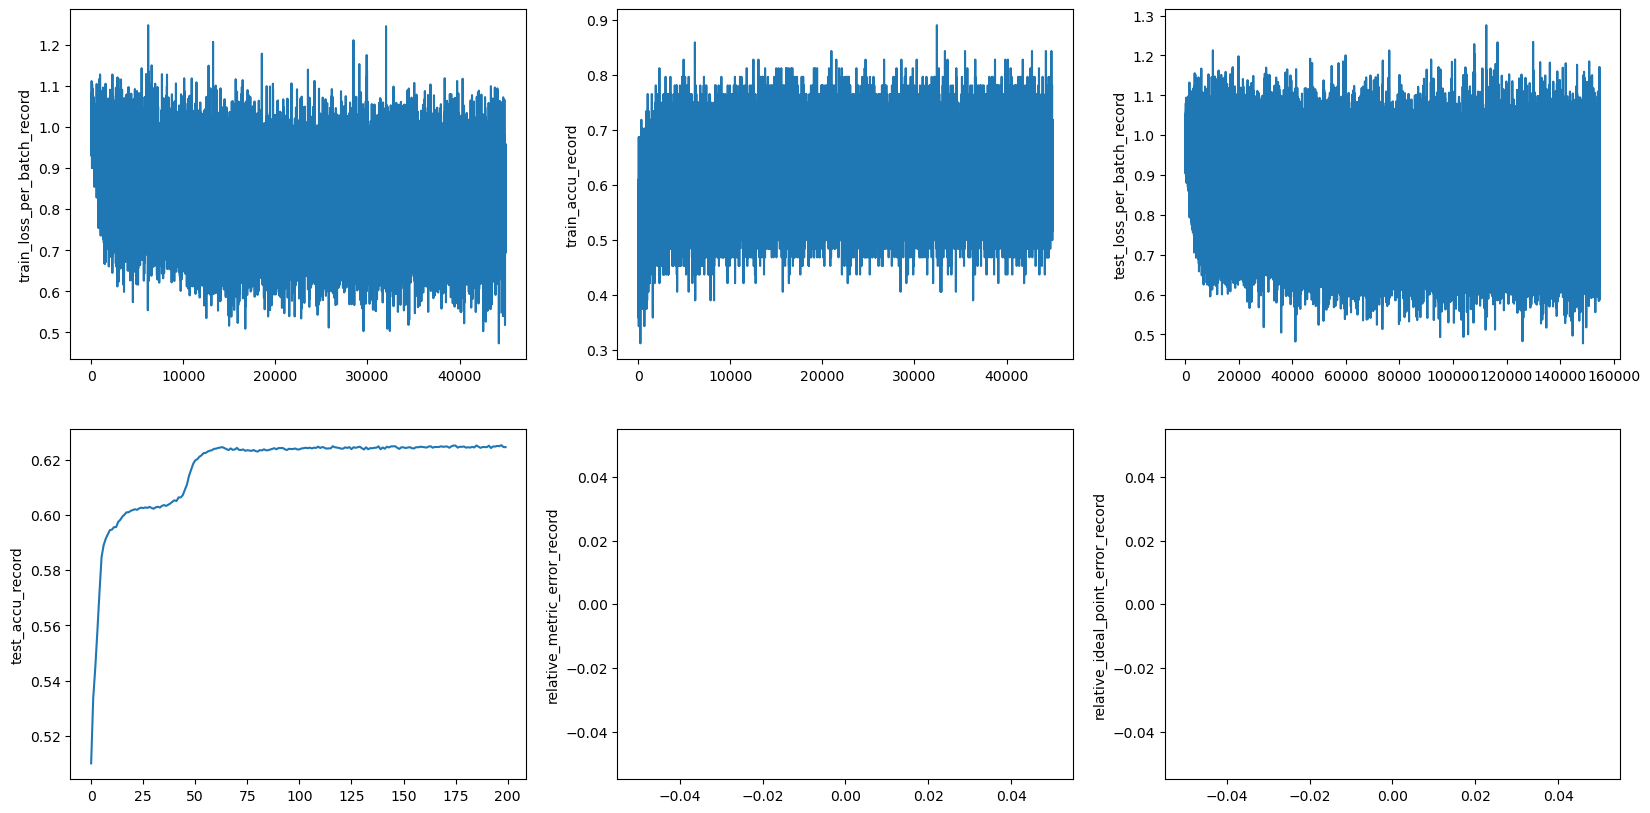

In [27]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
ax_flatten = ax.flatten()
for idx,key in enumerate(res['train_stats']):
    ax_flatten[idx].plot(res['train_stats'][key])
    ax_flatten[idx].set_ylabel(key)

In [18]:
train_stats_all[190]

{'epochs': 200,
 'bs': 64,
 'lr_us': 0.005,
 'lr_net': 0.0005,
 'feature_dim': 3,
 'num_users': 48,
 'num_pairs_per_user': 300,
 'weight_decay_us': 0,
 'weight_decay_net': 0.001,
 'optimizer_name': 'adam',
 'test_accu_record': [0.5099725452196382,
  0.5335917312661499,
  0.5447755167958657,
  0.5579578488372093,
  0.5718871124031008,
  0.5847464470284238,
  0.5890665374677002,
  0.5913678940568475,
  0.5930030684754521,
  0.5945373062015504,
  0.594718992248062,
  0.5956274224806202,
  0.5956274224806202,
  0.5975048449612403,
  0.5982719638242894,
  0.5994226421188631,
  0.6001493863049095,
  0.6009972545219638,
  0.6009972545219638,
  0.6015221253229974,
  0.6018249354005168,
  0.6021075581395349,
  0.6018854974160207,
  0.6023699935400517,
  0.6026929909560723,
  0.6024911175710594,
  0.6027737403100775,
  0.6025718669250646,
  0.6029756136950905,
  0.6025718669250646,
  0.6022892441860465,
  0.6027939276485789,
  0.603015988372093,
  0.6027131782945736,
  0.6033187984496124,
  0.60

In [41]:
explorefilePath = './save/grid_search_lrus0.005_lrnet0.0005_bs64_wdu0_wdn0.01_optadam.pt'
res = torch.load(explorefilePath)

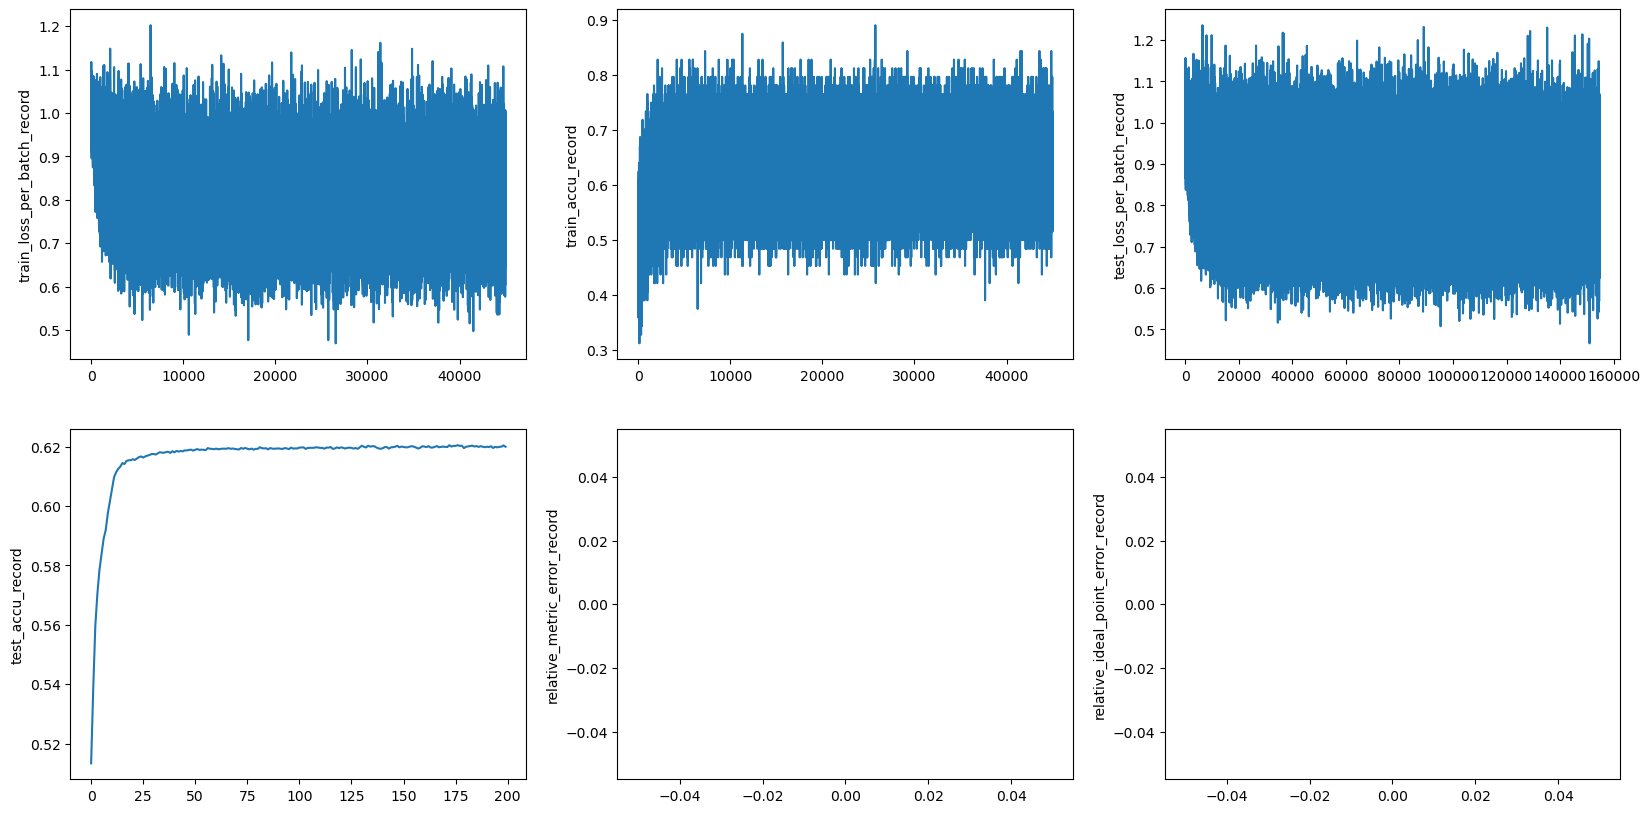

In [42]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
ax_flatten = ax.flatten()
for idx,key in enumerate(res['train_stats']):
    ax_flatten[idx].plot(res['train_stats'][key])
    ax_flatten[idx].set_ylabel(key)